In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


(60000, 28, 28)

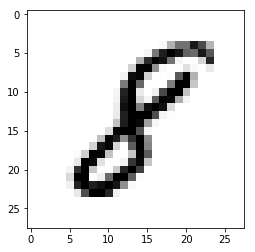

In [2]:

import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 7777 
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

x_train.shape

In [3]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


In [4]:

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(x=x_train,y=y_train, validation_split=0.33, epochs=10)

Instructions for updating:
Use tf.cast instead.
Train on 40199 samples, validate on 19801 samples
Epoch 1/10
40199/40199 [==============================] - 18s 439us/step - loss: 0.2584 - acc: 0.9238 - val_loss: 0.1213 - val_acc: 0.9642
Epoch 2/10
40199/40199 [==============================] - 17s 412us/step - loss: 0.1066 - acc: 0.9674 - val_loss: 0.0924 - val_acc: 0.9725
Epoch 3/10
40199/40199 [==============================] - 17s 422us/step - loss: 0.0687 - acc: 0.9788 - val_loss: 0.0810 - val_acc: 0.9759
Epoch 4/10
40199/40199 [==============================] - 17s 423us/step - loss: 0.0508 - acc: 0.9843 - val_loss: 0.0725 - val_acc: 0.9790
Epoch 5/10
40199/40199 [==============================] - 17s 423us/step - loss: 0.0406 - acc: 0.9867 - val_loss: 0.0738 - val_acc: 0.9807
Epoch 6/10
40199/40199 [==============================] - 17s 424us/step - loss: 0.0322 - acc: 0.9894 - val_loss: 0.0675 - val_acc: 0.9817
Epoch 7/10
40199/40199 [==============================] - 18s 459us/

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


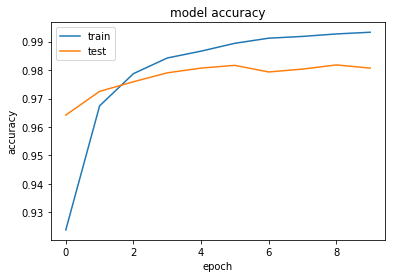

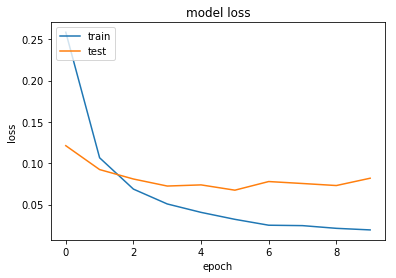

In [7]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Learning accuracy
-------

In [6]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 140us/step


[0.07510687078836199, 0.9815]